In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
project_path = str(Path().joinpath('..', 'triple_agent').resolve())
sys.path.append(project_path)
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.replays.get_parsed_replays import get_parsed_replays
from triple_agent.utilities.event_constants import SCL5_DIVISIONS, select_scl5
from triple_agent.reports.banana_breads import (all_banana_bread_percentages,
                                                first_banana_bread_percentages,
                                                banana_split)

In [4]:
scl5_replays = get_parsed_replays(select_scl5)

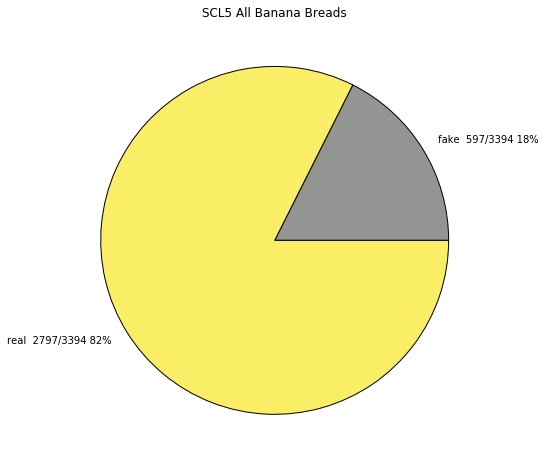

In [5]:
all_banana_bread_percentages(scl5_replays, "SCL5 All Banana Breads")

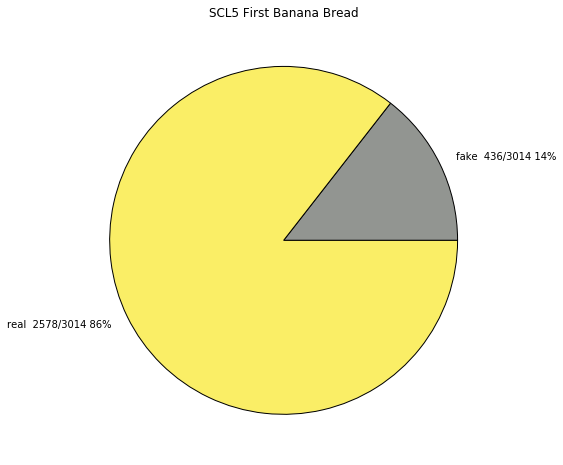

In [6]:
first_banana_bread_percentages(scl5_replays, "SCL5 First Banana Bread")

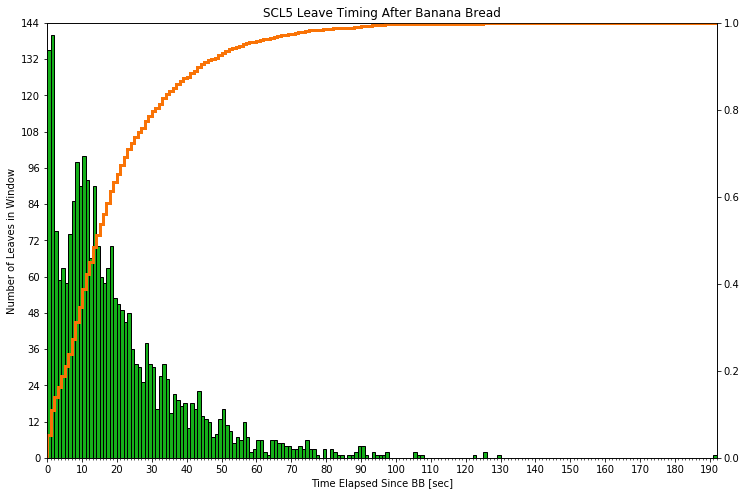

In [7]:
banana_split(scl5_replays, "SCL5 Leave Timing After Banana Bread")

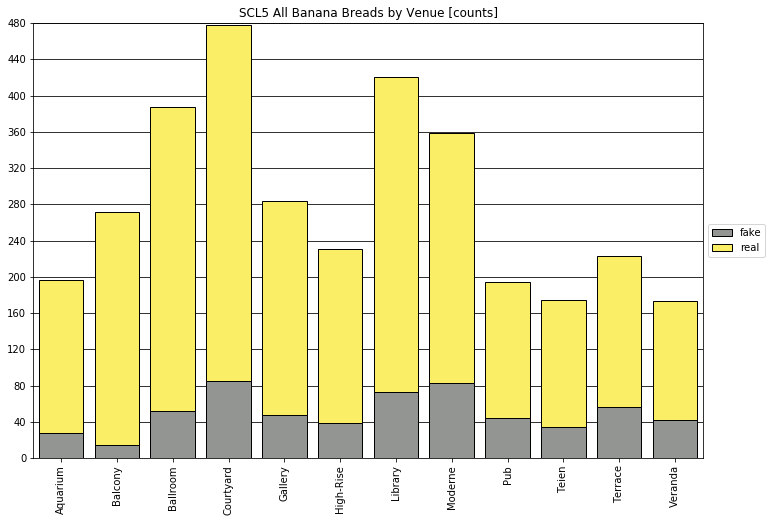

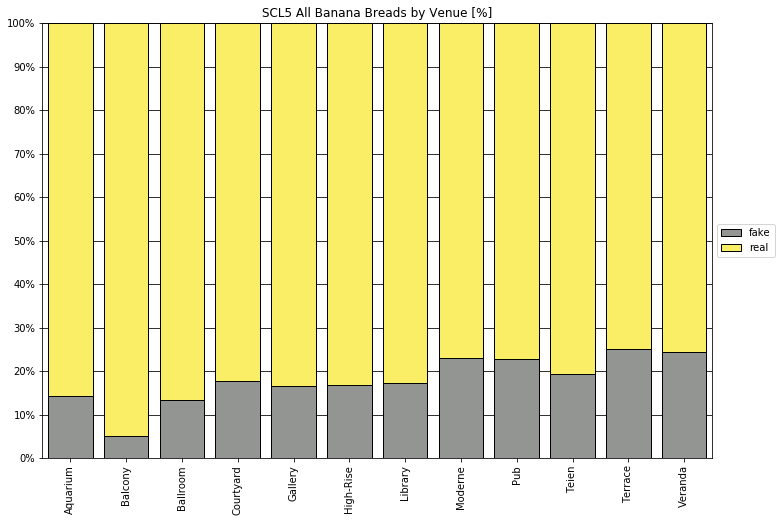

In [8]:
all_banana_bread_percentages(scl5_replays, "SCL5 All Banana Breads by Venue", groupby=lambda g: g.venue)

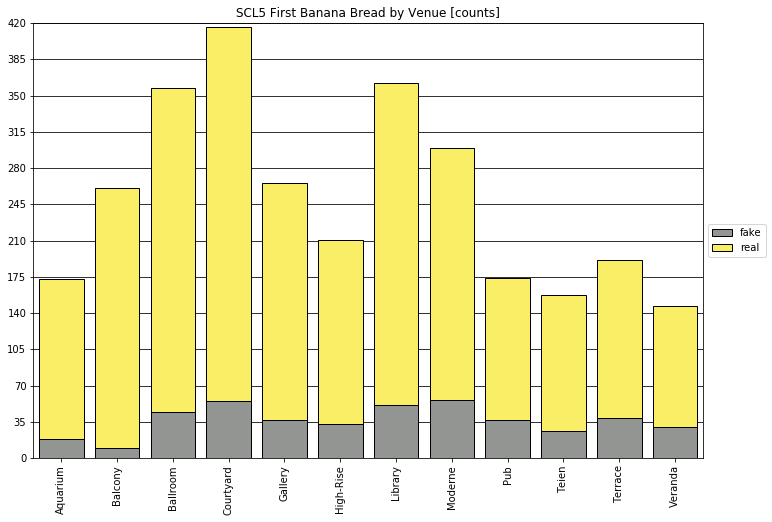

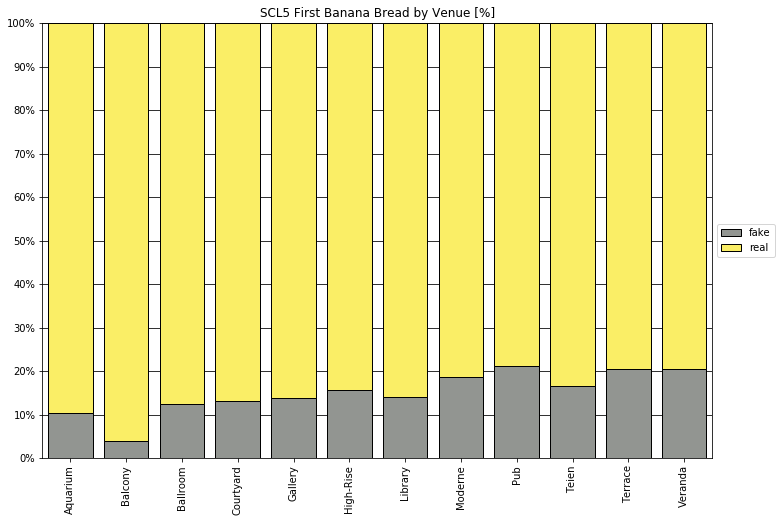

In [9]:
first_banana_bread_percentages(scl5_replays, "SCL5 First Banana Bread by Venue", groupby=lambda g: g.venue)

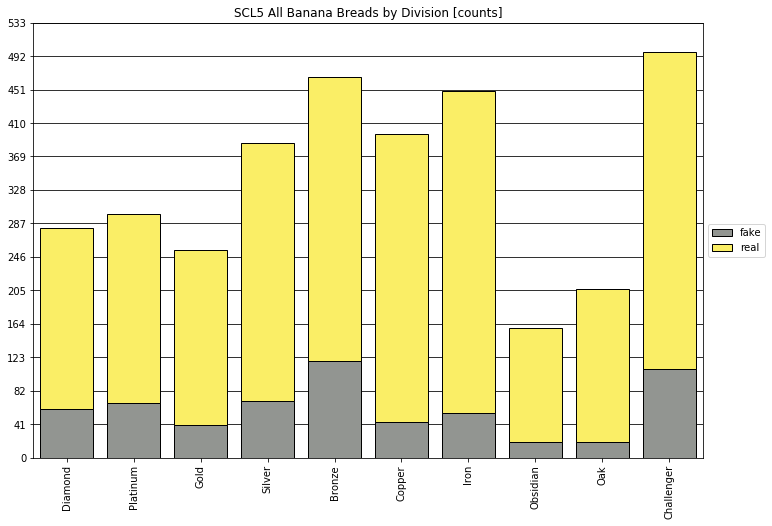

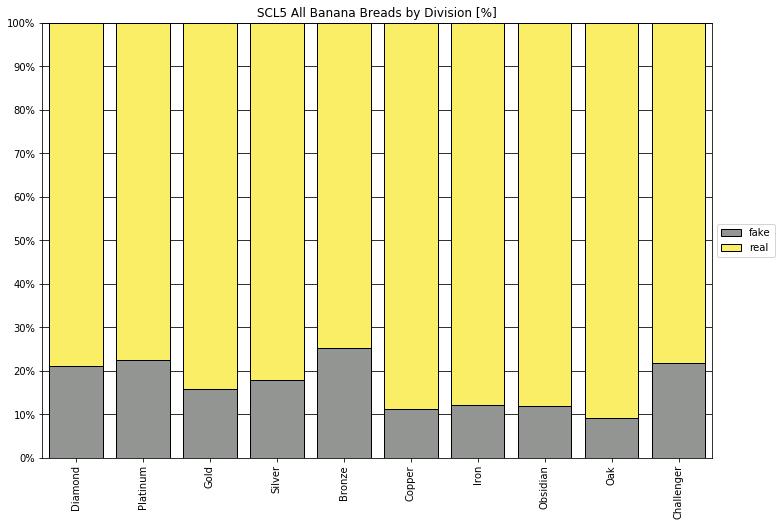

In [10]:
all_banana_bread_percentages(
    scl5_replays,
    "SCL5 All Banana Breads by Division",
    groupby=lambda g: g.division,
    category_name_order=lambda g: SCL5_DIVISIONS.index(g)
)

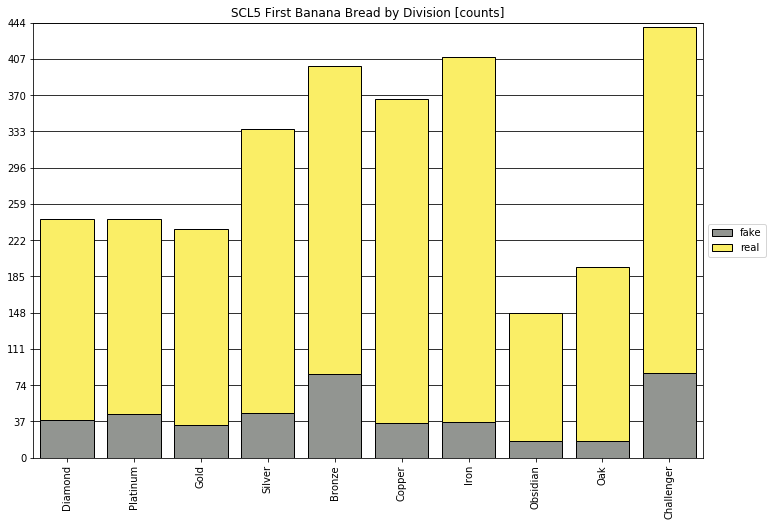

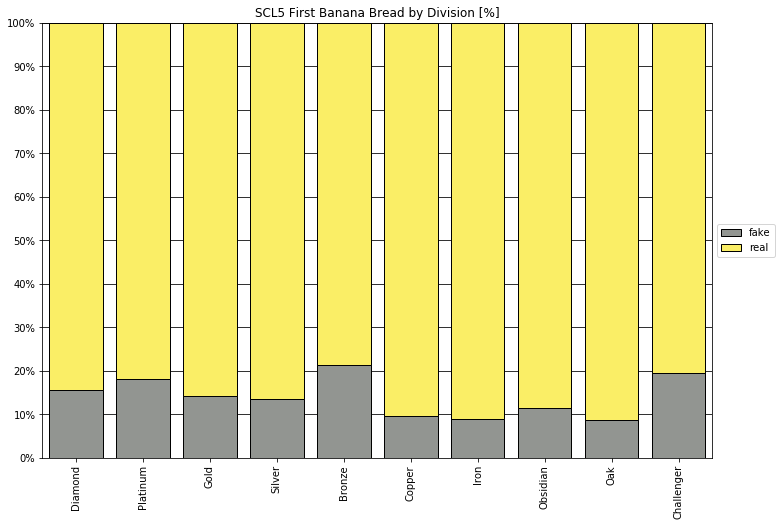

In [11]:
first_banana_bread_percentages(
    scl5_replays,
    "SCL5 First Banana Bread by Division",
    groupby=lambda g: g.division,
    category_name_order=lambda g: SCL5_DIVISIONS.index(g)
)

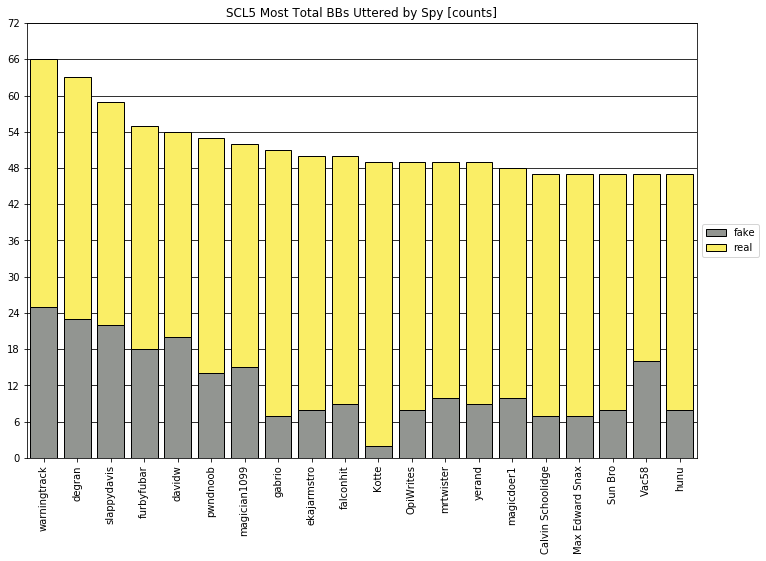

In [12]:
all_banana_bread_percentages(
    scl5_replays,
    'SCL5 Most Total BBs Uttered by Spy',
    groupby=lambda g: g.spy,
    category_data_order=sum,
    limit=20,
    percentile_plot=False
)

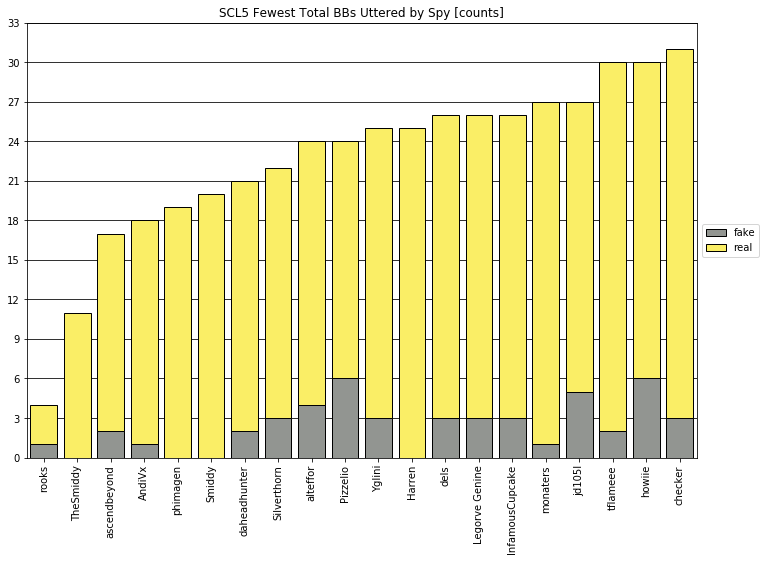

In [13]:
all_banana_bread_percentages(
    scl5_replays,
    'SCL5 Fewest Total BBs Uttered by Spy',
    groupby=lambda g: g.spy,
    category_data_order=sum,
    reversed_data_sort=True,
    limit=20,
    percentile_plot=False
)

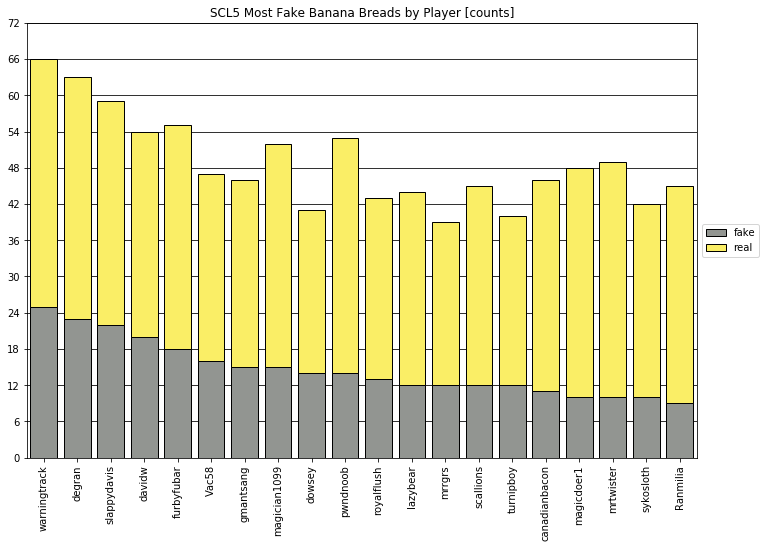

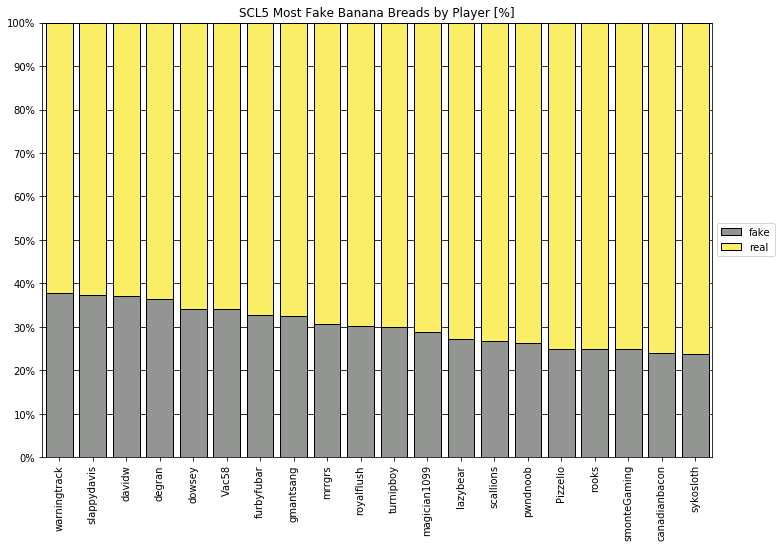

In [14]:
all_banana_bread_percentages(
    scl5_replays,
    "SCL5 Most Fake Banana Breads by Player",
    groupby=lambda g: g.spy,
    category_data_order="fake",
    limit=20
)

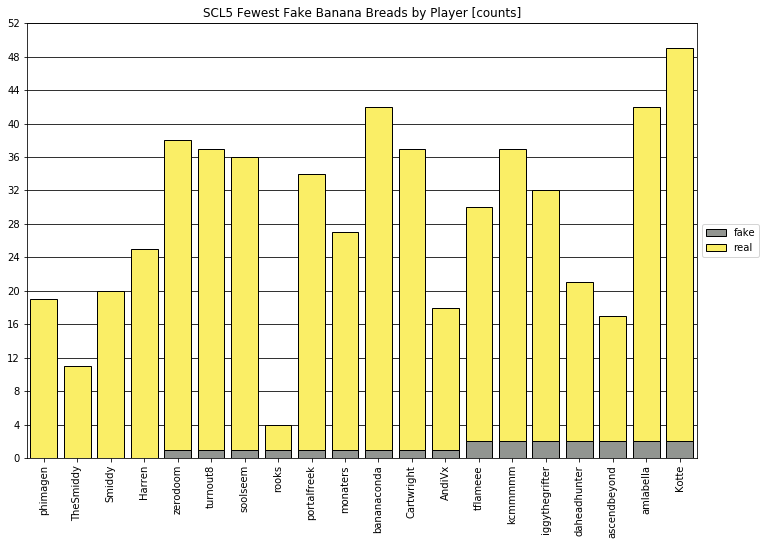

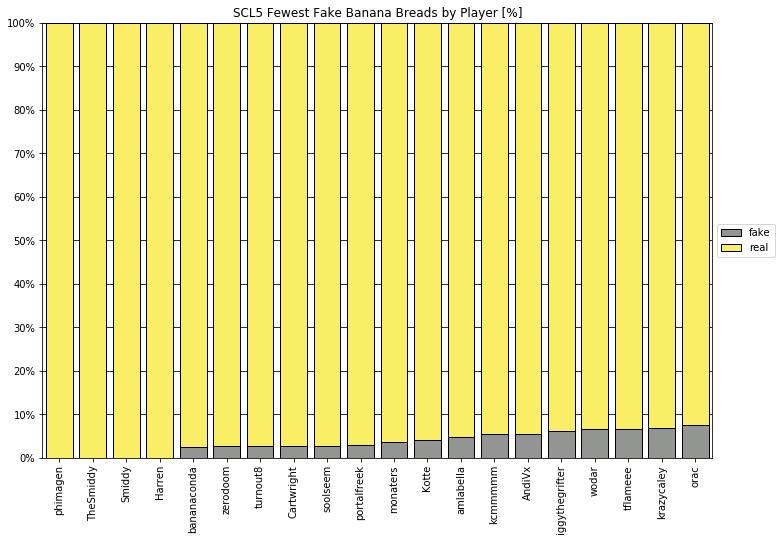

In [15]:
all_banana_bread_percentages(
    scl5_replays,
    "SCL5 Fewest Fake Banana Breads by Player",
    groupby=lambda g: g.spy,
    category_data_order="fake",
    reversed_data_sort=True,
    limit=20
)